# Image Colorization Data Exploration

This repository contains the data exploration for the Image Colorization dataset by Shravankumar Shetty that contains 25k 244x244 images. This datset is a subset of the MIRFLICKR25k dataset

## LAB* Definition
LAB* stands for:
- L*: Lightness
- A*: Red/Green Value
- B*: Blue/Yellow Value


## Dataset

The dataset consists of two folders:
1. **ab**: This contains 3 .npy files consisting of a and b dimensions of LAB color space images.
2. **l**: This consists one .npy file which contains the l dimension of the LAB color space images.

### Download the Dataset

You can download the original kaggle dataset [here](https://www.kaggle.com/datasets/shravankumar9892/image-colorization/data)


### Setup Environment

To set up the environment execute the following two cells containing bash commands

In [ ]:
!pip install numpy matplotlib scikit-image gdown

In [ ]:
# Download the dataset and unzip it
!gdown --id "1l06eyWPfUtQuDgHB-nB1P9aRp1FMw_JQ"
!unzip -q "grayscale.zip"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.color import lab2rgb
import gc
import pandas as pd

pd.options.display.float_format = '{:.2f}'.format

In [3]:
ab1_path = "ab/ab1.npy"
ab2_path = "ab/ab2.npy"
ab3_path = "ab/ab3.npy"
l_path = "l/gray_scale.npy"

ab1 = np.load(ab1_path)
ab2 = np.load(ab2_path)
ab3 = np.load(ab3_path)
l = np.load(l_path).reshape((25000, 224, 224, 1))

In [4]:
l.shape, ab1.shape, ab2.shape, ab3.shape

((25000, 224, 224, 1),
 (10000, 224, 224, 2),
 (10000, 224, 224, 2),
 (5000, 224, 224, 2))

In [5]:
ab = np.vstack((ab1, ab2, ab3))
lab = np.concat((l, ab), axis=3)
ab1 = ab2 = ab3 = ab = l = None
gc.collect()

44

In [11]:
df = pd.DataFrame(lab.reshape(-1,3), columns=['l','a','b'])
l_mean, l_std = df['l'].mean(), df['l'].std()
a_mean, a_std = df['a'].mean(), df['a'].std()
b_mean, b_std = df['b'].mean(), df['b'].std()
df.describe()

l             a             b
count 1254400000.00 1254400000.00 1254400000.00
mean         105.94        131.03        134.96
std           71.86         13.59         19.46
min            0.00         42.00         20.00
25%           44.00        126.00        127.00
50%          100.00        128.00        130.00
75%          161.00        133.00        143.00
max          255.00        226.00        223.00

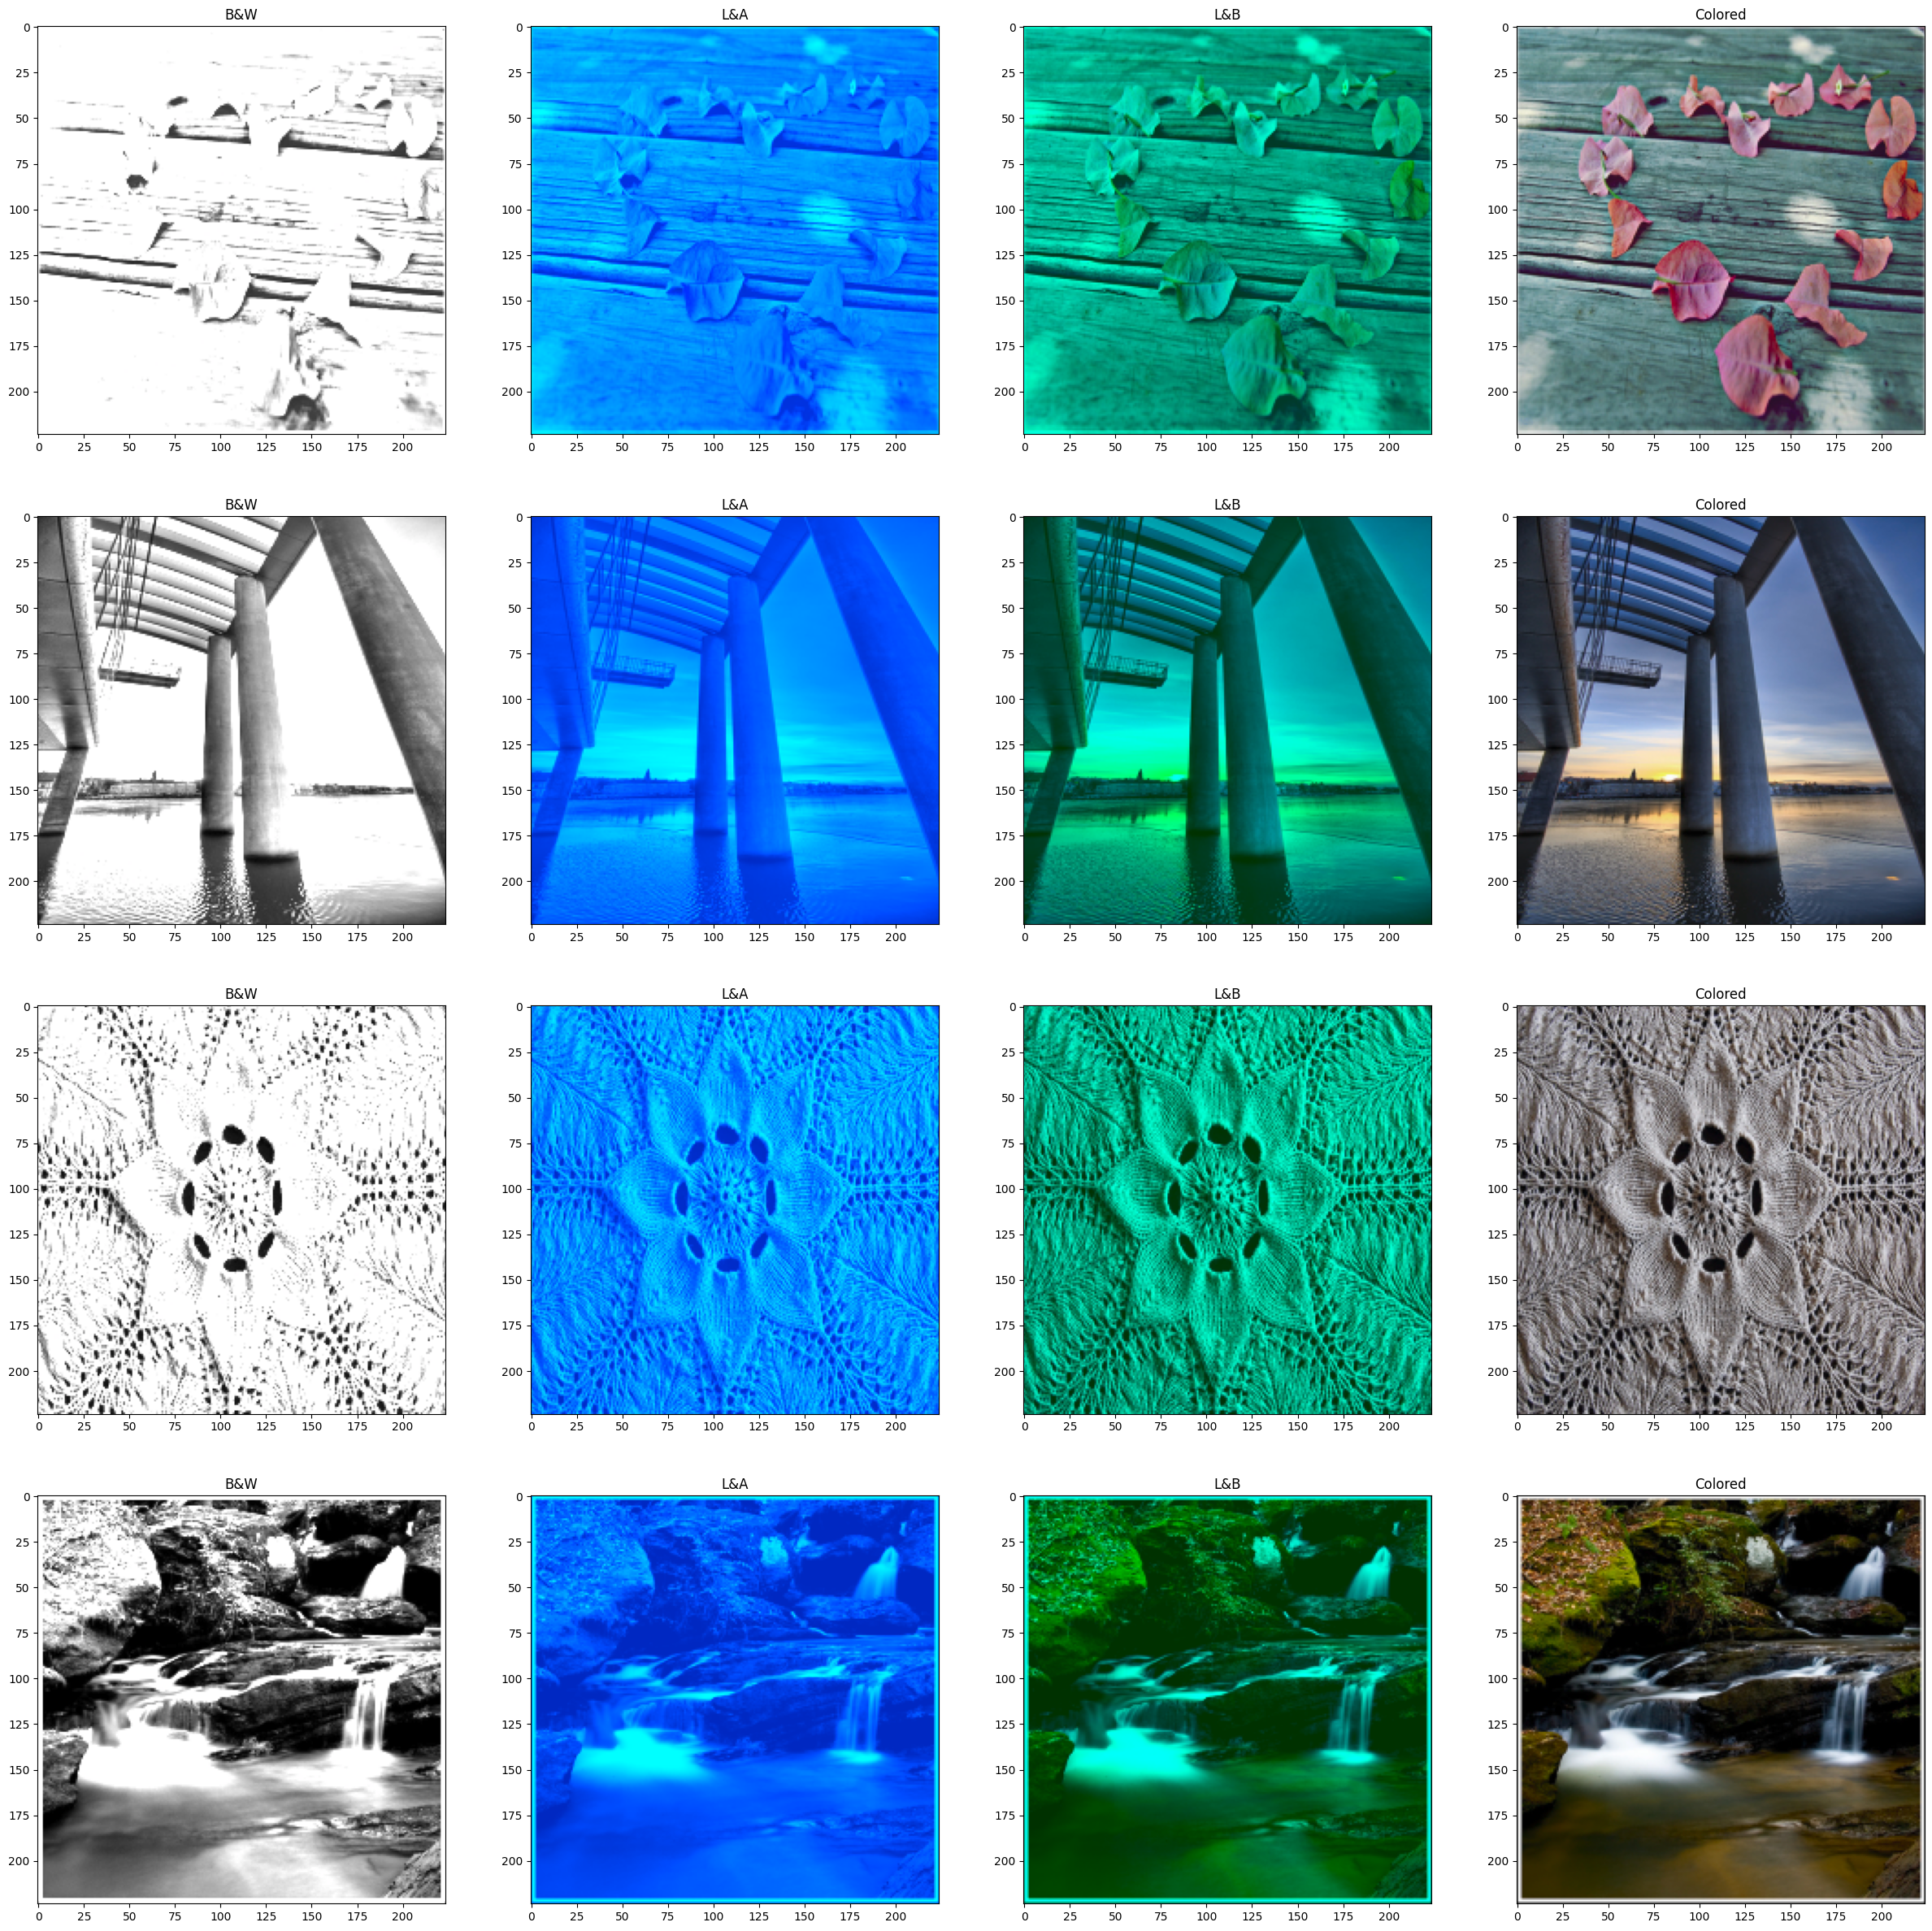

In [8]:
plt.figure(figsize=(30,30))
for i in range(1,16,4):
    plt.subplot(4,4,i)
    img = np.zeros((224,224,3))
    img[:,:,0] = lab[i][:,:,0]
    plt.title('B&W')
    plt.imshow(lab2rgb(img))
    
    plt.subplot(4,4,i+1)
    img = np.zeros((224,224,3))
    img[:,:,(0,1)] = lab[i][:,:,(0,1)]
    img = img.astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    plt.title('L&A')
    plt.imshow(img)

    plt.subplot(4,4,i+2)
    img = np.zeros((224,224,3))
    img[:,:,(0,2)] = lab[i][:,:,(0,2)]
    img = img.astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    plt.title('L&B')
    plt.imshow(img)

    plt.subplot(4,4,i+3)
    img = np.zeros((224,224,3))
    img[:,:,:] = lab[i][:,:,:]
    img = img.astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    plt.title('Colored')
    plt.imshow(img)

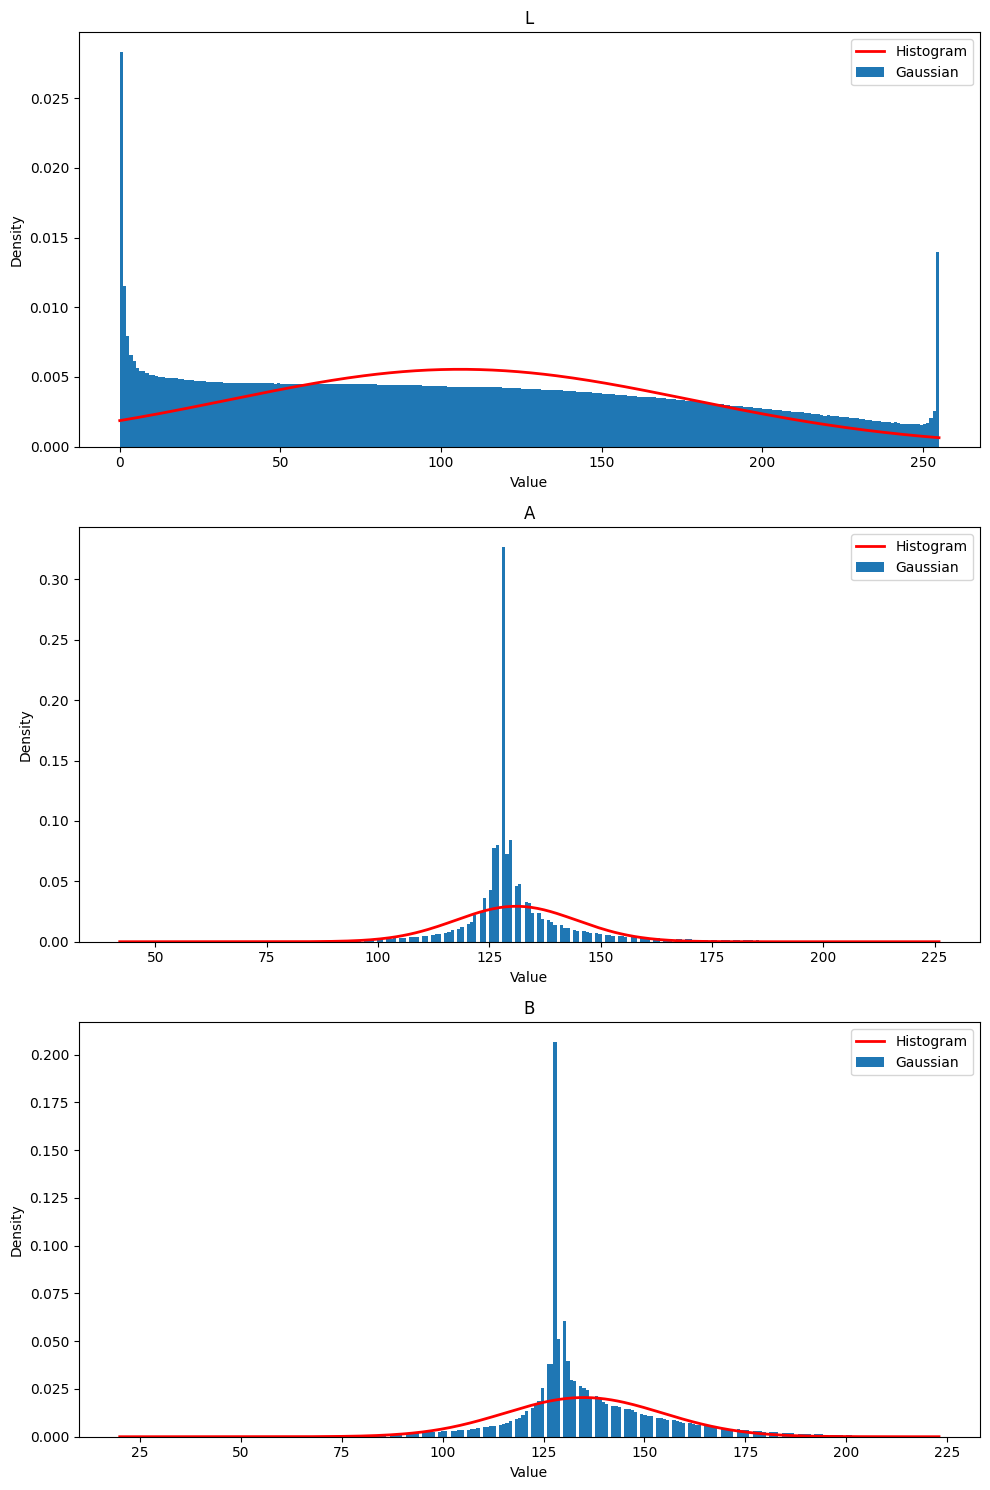

In [16]:
sigma = [l_std, a_std, b_std]
mu = [l_mean, a_mean, b_mean]
names = ['L', 'A', 'B']

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i in range(3):
    count, bins, ignored = axs[i].hist(lab[:, :, :, i].reshape(-1), 255, density=True)
    axs[i].set_title(names[i])
    axs[i].set_ylabel("Density")
    axs[i].set_xlabel("Value")
    axs[i].plot(
        bins,
        1 / (sigma[i] * np.sqrt(2 * np.pi)) * np.exp(-((bins - mu[i]) ** 2) / (2 * sigma[i]**2)),
        linewidth=2,
        color="r",
    )
    axs[i].legend(["Histogram", "Gaussian"], loc="upper right")

plt.tight_layout()
plt.show()

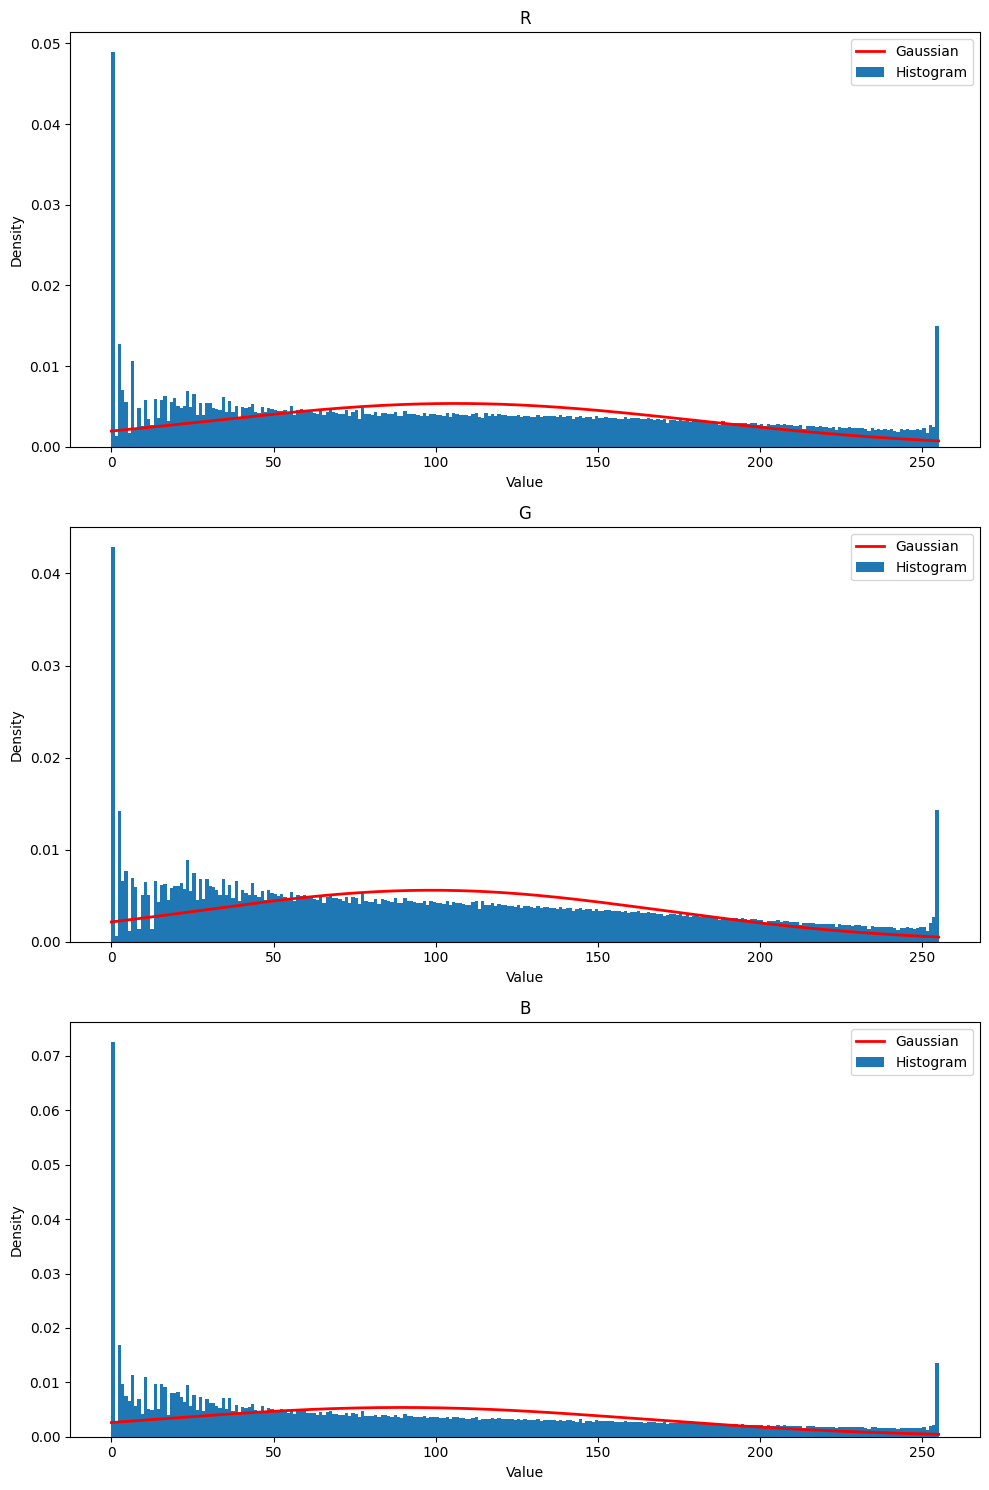

In [18]:
rgb_images = []
for i in range(lab.shape[0]):
    lab_image = lab[i]
    img = np.zeros((224, 224, 3))
    img[:, :, :] = lab_image[:, :, :]
    img = img.astype('uint8')
    rgb_image = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    rgb_images.append(rgb_image)

rgb_images = np.array(rgb_images)

# Calculate the mean and standard deviation for RGB channels
r_mean = np.mean(rgb_images[:, :, :, 0])
g_mean = np.mean(rgb_images[:, :, :, 1])
b_mean = np.mean(rgb_images[:, :, :, 2])
r_std = np.std(rgb_images[:, :, :, 0])
g_std = np.std(rgb_images[:, :, :, 1])
b_std = np.std(rgb_images[:, :, :, 2])

mu = [r_mean, g_mean, b_mean]
sigma = [r_std, g_std, b_std]
names = ['R', 'G', 'B']

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i in range(3):
    channel_data = rgb_images[:, :, :, i].reshape(-1)
    count, bins, ignored = axs[i].hist(channel_data, 255, density=True)
    axs[i].set_title(names[i])
    axs[i].set_ylabel("Density")
    axs[i].set_xlabel("Value")
    axs[i].plot(
        bins,
        1 / (sigma[i] * np.sqrt(2 * np.pi)) * np.exp(-((bins - mu[i]) ** 2) / (2 * sigma[i]**2)),
        linewidth=2,
        color="r",
    )
    axs[i].legend(["Gaussian", "Histogram"], loc="upper right")

plt.tight_layout()
plt.show()

In [30]:
rgb_df = pd.DataFrame(rgb_images.reshape(-1,3), columns=['r','g','b'])
rgb_df.describe()

r             g             b
count 1254400000.00 1254400000.00 1254400000.00
mean         106.00         98.72         89.29
std           74.42         71.36         74.19
min            0.00          0.00          0.00
25%           40.00         37.00         23.00
50%           99.00         88.00         72.00
75%          165.00        152.00        145.00
max          255.00        255.00        255.00